In [36]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

path = 'C:/Users/OptimusPrime/Desktop/Studia/NLP1/Natural-Language-Processing-1/Week 1/Datasets'
languages = ['english', 'spanish', 'polish', 'finnish', 'german', 'italian']
languages_encoder = {'english': 0, 'spanish': 1, 'polish': 2, 'finnish': 3, 'german': 4, 'italian': 5}
languages_decoder = {0: 'english', 1: 'spanish', 2: 'polish', 3: 'finnish', 4: 'german', 5: 'italian'}

In [37]:
def load_preprocess_label_data_from(path):
    X = list()
    y = list()
    for dataset in os.listdir(path):
        if dataset.endswith('.txt'):
            with open(path + '\\' + dataset, 'r', errors='ignore') as f:
                text = f.read() 
                text = re.sub(r"[\\\^\$\.\|\?\*\+\(\)\[\]\{1-9\"!\-_=%<>]", '', text)
                lines = text.split('\n')
                lines = [_ for _ in lines if _ != '']
                X += lines
            for language in languages:
                if language in dataset:
                    y += len(lines)*[languages_encoder[language]]
    return np.array(X), np.array(y)

X, y = load_preprocess_label_data_from(path)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [39]:
def count_train_and_test_samples():
    print("Total number of train samples:" + str(len(y_train)))
    print("Total number of test samples:" + str(len(y_test))) 

    train_samples_counter = dict()
    test_samples_counter = dict()

    for _ in languages:
        train_samples_counter[_] = 0
        test_samples_counter[_] = 0

    for language_id in y_train:
        train_samples_counter[languages_decoder[language_id]] += 1
    print("Number of train lines for each language:")
    print(train_samples_counter)    
        
    for language_id in y_test:
        test_samples_counter[languages_decoder[language_id]] += 1
    print("Number of test lines for each language:")
    print(test_samples_counter)    
    
count_train_and_test_samples()    

Total number of train samples:140340
Total number of test samples:35086
Number of train lines for each language:
{'english': 26493, 'spanish': 24896, 'polish': 679, 'finnish': 24961, 'german': 53864, 'italian': 9447}
Number of test lines for each language:
{'english': 6608, 'spanish': 6231, 'polish': 153, 'finnish': 6171, 'german': 13566, 'italian': 2357}


In [40]:
def show_proba(probabilities):
    print('Predictions:')
    for lang, prob in zip(label_names, probabilities[0]):
        print(lang + ': ' + str('%.2f' % float(100 * prob)) + '%\t')
        
validation_samples = [["Cześć, mam dwadzieścia trzy lata, jak się masz?"], 
              ["Hi, I'm twenty-three, how are you?"], 
              ["Hola tengo veintitrés, ¿cómo estás?"],
              ["Ciao, sono ventitré, come stai?"],
              ["Hallo, ich bin dreiundzwanzig, wie geht es dir?"],
              ["Hei Im kaksikymmentäkolme, miten olet?"]]
ngram_ranges = [2, 3, 4, 5, 6]

polish_scores = list()
english_scores = list()
spanish_scores = list()
italian_scores = list()
german_scores = list()
finnish_scores = list()

for n in ngram_ranges:
    pipe = Pipeline([('vectorizer', TfidfVectorizer(ngram_range=(n, n), analyzer='char')), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print(str(n) + '-gram results:')
    polish_scores.append(pipe.predict_proba(["Cześć, mam dwadzieścia trzy lata, jak się masz?"])[0][2])
    english_scores.append(pipe.predict_proba(["Hi, I'm twenty-three, how are you?"])[0][0])
    spanish_scores.append(pipe.predict_proba(["Hola tengo veintitrés, ¿cómo estás?"])[0][1])
    italian_scores.append(pipe.predict_proba(["Ciao, sono ventitré, come stai?"])[0][5])
    german_scores.append(pipe.predict_proba(["Hallo, ich bin dreiundzwanzig, wie geht es dir?"])[0][4])
    finnish_scores.append(pipe.predict_proba(["Hei Im kaksikymmentäkolme, miten olet?"])[0][3])

    print("\nValidation sample: Cześć, mam dwadzieścia trzy lata, jak się masz?")
    show_proba(pipe.predict_proba(["Cześć, mam dwadzieścia trzy lata, jak się masz?"]))
    print("\nValidation sample: Hi, I'm twenty-three, how are you?")
    show_proba(pipe.predict_proba(["Hi, I'm twenty-three, how are you?"]))
    print("\nValidation sample: Hola tengo veintitrés, ¿cómo estás?")
    show_proba(pipe.predict_proba(["Hola tengo veintitrés, ¿cómo estás?"]))
    print("\nValidation sample: Ciao, sono ventitré, come stai?")
    show_proba(pipe.predict_proba(["Ciao, sono ventitré, come stai?"]))
    print("\nValidation sample: Hallo, ich bin dreiundzwanzig, wie geht es dir?")
    show_proba(pipe.predict_proba(["Hallo, ich bin dreiundzwanzig, wie geht es dir?"]))
    print("\nValidation sample: Hei Im kaksikymmentäkolme, miten olet?")
    show_proba(pipe.predict_proba(["Hei Im kaksikymmentäkolme, miten olet?"]))
    print('\n')


2-gram results:

Validation sample: Cześć, mam dwadzieścia trzy lata, jak się masz?
Predictions:
english: 0.22%	
spanish: 3.68%	
polish: 91.29%	
finnish: 2.49%	
german: 0.65%	
italian: 1.67%	

Validation sample: Hi, I'm twenty-three, how are you?
Predictions:
english: 98.94%	
spanish: 0.28%	
polish: 0.55%	
finnish: 0.09%	
german: 0.05%	
italian: 0.09%	

Validation sample: Hola tengo veintitrés, ¿cómo estás?
Predictions:
english: 8.13%	
spanish: 88.02%	
polish: 0.39%	
finnish: 0.80%	
german: 0.57%	
italian: 2.09%	

Validation sample: Ciao, sono ventitré, come stai?
Predictions:
english: 3.06%	
spanish: 16.23%	
polish: 0.12%	
finnish: 0.19%	
german: 0.45%	
italian: 79.95%	

Validation sample: Hallo, ich bin dreiundzwanzig, wie geht es dir?
Predictions:
english: 0.15%	
spanish: 0.05%	
polish: 0.19%	
finnish: 0.01%	
german: 99.20%	
italian: 0.40%	

Validation sample: Hei Im kaksikymmentäkolme, miten olet?
Predictions:
english: 0.44%	
spanish: 0.01%	
polish: 0.44%	
finnish: 79.71%	
german: 

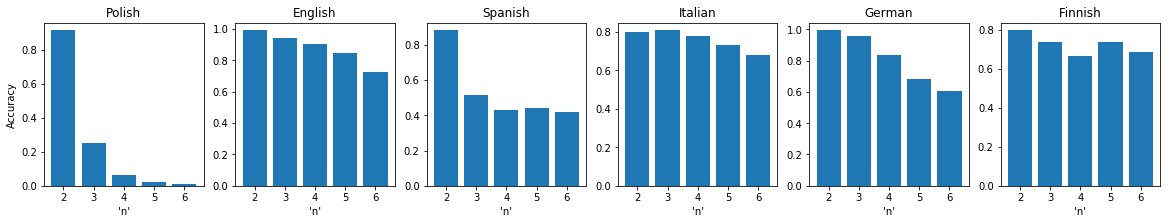

In [41]:
nns = ['2', '3', '4', '5', '6']

plt.figure(figsize=(20, 3))

plt.subplot(161)
plt.title('Polish')
plt.bar(nns, polish_scores)
plt.xlabel('\'n\'')
plt.ylabel('Accuracy')
plt.subplot(162)
plt.title('English')
plt.bar(nns, english_scores)
plt.xlabel('\'n\'')
plt.subplot(163)
plt.title('Spanish')
plt.bar(nns, spanish_scores)
plt.xlabel('\'n\'')
plt.subplot(164)
plt.title('Italian')
plt.bar(nns, italian_scores)
plt.xlabel('\'n\'')
plt.subplot(165)
plt.title('German')
plt.bar(nns, german_scores)
plt.xlabel('\'n\'')
plt.subplot(166)
plt.title('Finnish')
plt.bar(nns, finnish_scores)
plt.xlabel('\'n\'')

plt.show()